In [46]:
# Install the libraries to process data:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib as plt
# Install the libraries to process dates:
from datetime import datetime, timedelta, date

In [47]:
### Question 1: Create a function to gather 3 year worth of stocks for AAPL, TSLA, AMZN & Google:
def fetch_raw_data(tickers=["AAPL", "TSLA", "AMZN", "GOOG"]) -> pd.DataFrame:
    # 1) Define the time interval:
    endDate = date.today()
    startDate = (endDate - pd.DateOffset(years=2)).date()
    # 2) Define an empty list that will store each individual stock DataFrame:
    stocks_df = []
    # 3) Iterate over each stocks in the ticker:
    for ticker in tickers:
        try: # 3.1) Attempt to fetch the stock data from yfinance api:
            df = yf.download(tickers=ticker, start=startDate, end=endDate, progress=False)
            # 3.2) Assess if there is a multi-index column and if true => remove it:
            if isinstance(df.columns, pd.MultiIndex):
                # Only use the first level of the multi index:
                df.columns = df.columns.get_level_values(0)
            # 3.3) Reset the index:
            df.reset_index(inplace=True)
            # 3.4) Define the feature to keep:
            df = df[["Date", "Open", "High", "Close", "Adj Close"]]
            # 3.5) Add the ticker as feature:
            df["Ticker"] = ticker
            # 3.5) Append the DataFrame to the stocks_df list:
            stocks_df.append(df)
        except Exception as e:
            print(f"Couldn't fetch data related to {ticker}: {str(e)}")
            continue
    # 4) Concatenate all DataFrames present in the stock_df into a single DataFrame that will be returned:
    df = pd.concat(stocks_df, ignore_index=True)
    return df

raw_df = fetch_raw_data()
print(raw_df)

Price       Date        Open        High       Close   Adj Close Ticker
0     2022-12-12  142.699997  144.500000  144.490005  142.986374   AAPL
1     2022-12-13  149.500000  149.970001  145.470001  143.956177   AAPL
2     2022-12-14  145.350006  146.660004  143.210007  141.719681   AAPL
3     2022-12-15  141.110001  141.800003  136.500000  135.079514   AAPL
4     2022-12-16  136.690002  137.649994  134.509995  133.110229   AAPL
...          ...         ...         ...         ...         ...    ...
2007  2024-12-05  177.320007  177.710007  174.309998  174.112473   GOOG
2008  2024-12-06  173.880005  176.839005  176.490005  176.290009   GOOG
2009  2024-12-09  175.714996  178.039993  177.100006  177.100006   GOOG
2010  2024-12-10  184.535004  188.029999  186.529999  186.529999   GOOG
2011  2024-12-11  186.699997  196.889999  196.710007  196.710007   GOOG

[2012 rows x 6 columns]


In [48]:
### Question 2: Write a script to format display the following previous DataFrame as a string in the following format:
### 1 AAPL, 2023-01-03 00:00:00, 130.27999877929688, 130.89999389648438, 124.16999816894531, 125.06999969482422, 123.76846313476562
from io import StringIO
import heapq

def process_df_to_fileFormat(df:pd.DataFrame) -> str:
    # 1) Define a min heap that will enable to process data according to asceding order => Chronological order:
    min_heap = []

    # 2) Iterraates through each rows yielded by iterrows() generator:
    for _, row in df.iterrows():
        # 2.1) Push the current row with respective fields into the min heap:
        heapq.heappush(min_heap, (row["Date"], row["Ticker"], row["Open"], row["High"], row["Close"], row["Adj Close"]))
    # 3) Define an index for when data will be redirected to StringIO file object:
    index = 1
    # 4) Instantiate a StringIO file to redirect standard output to it like in a file:
    result = StringIO()

    # 5) Iterrate over the min heap and on each lines od data popped from it => redirect S/O to the StringIO file:
    while min_heap:
        # 5.1) Get the current fields:
        date, ticker, open_price, high, close, adj_close = heapq.heappop(min_heap)
        # 5.2) Redirect the standard output to the StringIO file:
        print(f"{index}: {ticker}, {date}, {open_price}, {high}, {close}, {adj_close}", file=result)
        # 5.3) Increment the index:
        index += 1

    # 6) Reposition the pointer in the StringIO object at the beginning:
    result.seek(0)
    # 5) Return the content of the file:
    return result.getvalue()

file_data = process_df_to_fileFormat(raw_df)
print(file_data)

    

1: AAPL, 2022-12-12 00:00:00, 142.6999969482422, 144.5, 144.49000549316406, 142.9863739013672
2: AMZN, 2022-12-12 00:00:00, 89.20999908447266, 90.58000183105469, 90.55000305175781, 90.55000305175781
3: GOOG, 2022-12-12 00:00:00, 93.08999633789062, 93.875, 93.55999755859375, 93.22502899169922
4: TSLA, 2022-12-12 00:00:00, 176.10000610351562, 177.3699951171875, 167.82000732421875, 167.82000732421875
5: AAPL, 2022-12-13 00:00:00, 149.5, 149.97000122070312, 145.47000122070312, 143.9561767578125
6: AMZN, 2022-12-13 00:00:00, 95.2300033569336, 96.25, 92.48999786376953, 92.48999786376953
7: GOOG, 2022-12-13 00:00:00, 98.06999969482422, 99.80000305175781, 95.8499984741211, 95.50682830810547
8: TSLA, 2022-12-13 00:00:00, 174.8699951171875, 175.0500030517578, 160.9499969482422, 160.9499969482422
9: AAPL, 2022-12-14 00:00:00, 145.35000610351562, 146.66000366210938, 143.2100067138672, 141.7196807861328
10: AMZN, 2022-12-14 00:00:00, 92.5, 93.45999908447266, 91.58000183105469, 91.58000183105469
11:

In [49]:
### Question 3: Convert the file like string input to a dataFrame:
import re

def convert_file_input_to_df(str_input: str) -> pd.DataFrame:
    # 1) Remove leading & trailing whitespaces and divide each lines of the string input:
    lines = str_input.strip().split('\n')
    # 2) Define a list that will hold inner list for each components in a line:
    data = []

    # 3) Iterrate over each lines:
    for line in lines:
        # 3.1) Split each components of each lines: when a pattern is met:
        parts = re.split(r'\s*,\s*', line)
        # 3.2) Ensure 5 features were extracted:
        if len(parts)!=6:
            print("Error there isn't 5 features")
            return pd.DataFrame()

        # 3.3) Extract the required fields:
        parts[0] = parts[0].strip(':')
        ticker = parts[0].split()[1]
        date = parts[1].strip()
        open_price = float(parts[2].strip())
        high = float(parts[3].strip())
        close = float(parts[4].strip())
        adj_close = float(parts[5].strip())
        # 3.4) Combine the features into a list and append it to the data list:
        data.append([ticker, date, open_price, high, close, adj_close])

    # 4) Create the data frame from the list of list:
    unorganized_df = pd.DataFrame(data, columns=["Ticker", "Date", "Open", "High", "Close", "Adj Close"])
    # 4.1) Convert the date column back into a date time object:
    unorganized_df["Date"] = pd.to_datetime(unorganized_df["Date"])
    # 4.2) Sort the DataFrame according to ticker and date in ascending order:
    organized_df = unorganized_df.sort_values(by=["Ticker", "Date"]).reset_index(drop=True)
    return organized_df

df = convert_file_input_to_df(file_data)
print(df)
    
        

     Ticker       Date        Open        High       Close   Adj Close
0      AAPL 2022-12-12  142.699997  144.500000  144.490005  142.986374
1      AAPL 2022-12-13  149.500000  149.970001  145.470001  143.956177
2      AAPL 2022-12-14  145.350006  146.660004  143.210007  141.719681
3      AAPL 2022-12-15  141.110001  141.800003  136.500000  135.079514
4      AAPL 2022-12-16  136.690002  137.649994  134.509995  133.110229
...     ...        ...         ...         ...         ...         ...
2007   TSLA 2024-12-05  359.869995  375.429993  369.489990  369.489990
2008   TSLA 2024-12-06  377.420013  389.489990  389.220001  389.220001
2009   TSLA 2024-12-09  397.609985  404.799988  389.790009  389.790009
2010   TSLA 2024-12-10  392.679993  409.730011  400.989990  400.989990
2011   TSLA 2024-12-11  409.700012  424.880005  424.769989  424.769989

[2012 rows x 6 columns]


In [50]:
### Question 4: Compute monthly returns:
def compute_monthly_returns(df: pd.DataFrame) -> pd.DataFrame:
    # 1) Compute the daily returns:
    df["Daily Returns"] = df.groupby("Ticker")["Adj Close"].pct_change()
    # 2) Remove Nan values from the DataFrame:
    df.dropna(axis=0, subset=["Daily Returns"], inplace=True)
    # 3) Set the date column as the index for the resampling:
    df.set_index("Date", inplace=True)
    # 4) Compute the Monthly Return:
    monthly_returns = df.groupby("Ticker").resample('M')["Daily Returns"].apply(lambda x: (x+1).prod()-1)
    # 5) Reset the index:
    monthly_returns = monthly_returns.reset_index()
    # 6) Rename the column for clarity:
    monthly_returns.columns = ["Ticker", "Date", "Monthly Returns"]
    return monthly_returns

monthly_return_df = compute_monthly_returns(df)
print(monthly_return_df)

   Ticker       Date  Monthly Returns
0    AAPL 2022-12-31        -0.100768
1    AAPL 2023-01-31         0.110521
2    AAPL 2023-02-28         0.023183
3    AAPL 2023-03-31         0.118649
4    AAPL 2023-04-30         0.028987
..    ...        ...              ...
95   TSLA 2024-08-31        -0.077390
96   TSLA 2024-09-30         0.221942
97   TSLA 2024-10-31        -0.045025
98   TSLA 2024-11-30         0.381469
99   TSLA 2024-12-31         0.230647

[100 rows x 3 columns]


/var/folders/cr/2bb2z7q96qnf5txnltjfttjm0000gn/T/ipykernel_65305/1917713579.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = df.groupby("Ticker").resample('M')["Daily Returns"].apply(lambda x: (x+1).prod()-1)


In [51]:
### Question 5: Compute the yearly return of each stock:
def compute_yearly_return(df: pd.DataFrame) -> pd.DataFrame:
    # 1) Set the date columns as the index for the resampling:
    df.set_index("Date", inplace=True)
    # 2) Compute the yearly return:
    yearly_df = df.groupby("Ticker").resample("A")["Monthly Returns"].apply(lambda x: (x+1).prod()-1)
    # 3) Reset the index:
    yearly_df = yearly_df.reset_index()
    # 4) Rename the column for clarity:
    yearly_df.columns = ["Ticker", "Date", "Annual Returns"]
    return yearly_df

test = compute_yearly_return(monthly_return_df)
print(test)
    

   Ticker       Date  Annual Returns
0    AAPL 2022-12-31       -0.100768
1    AAPL 2023-12-31        0.490081
2    AAPL 2024-12-31        0.286540
3    AMZN 2022-12-31       -0.072336
4    AMZN 2023-12-31        0.808810
5    AMZN 2024-12-31        0.515467
6    GOOG 2022-12-31       -0.051625
7    GOOG 2023-12-31        0.588302
8    GOOG 2024-12-31        0.400815
9    TSLA 2022-12-31       -0.265999
10   TSLA 2023-12-31        1.017211
11   TSLA 2024-12-31        0.709474


/var/folders/cr/2bb2z7q96qnf5txnltjfttjm0000gn/T/ipykernel_65305/1127480474.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_df = df.groupby("Ticker").resample("A")["Monthly Returns"].apply(lambda x: (x+1).prod()-1)


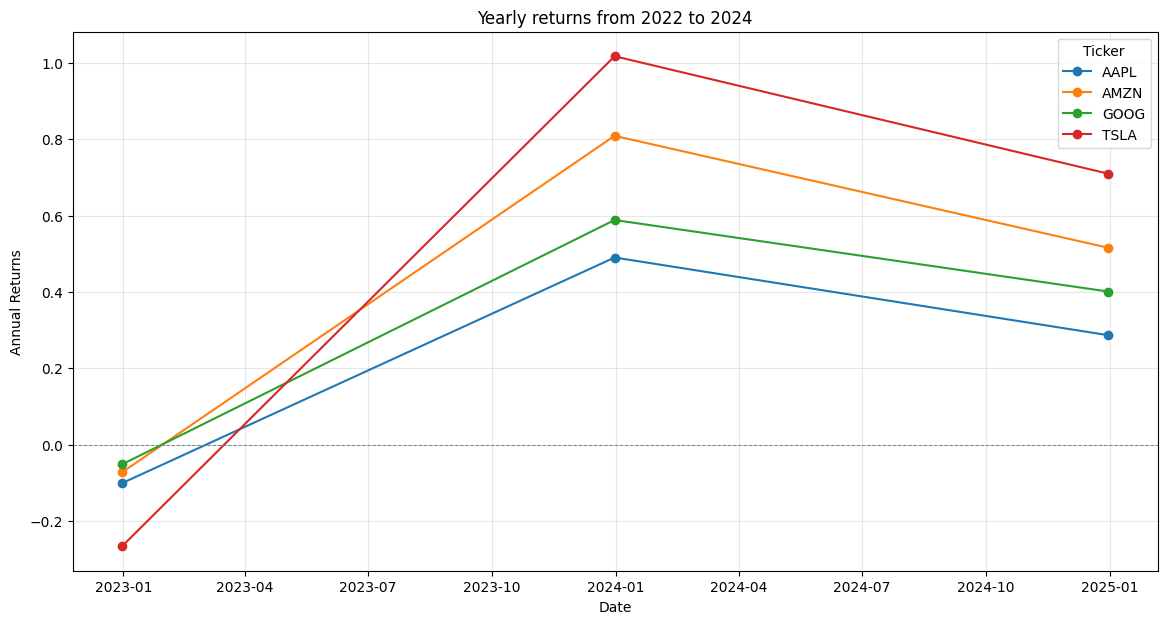

In [52]:
### Question 6: Plot the yearly annual return of all stocks:
import matplotlib.pyplot as plt

def plot_annual_returns(df: pd.DataFrame, title="Yearly returns from 2022 to 2024"):
    # 1) Ensure the date column is in DateTime format:
    df["Date"] = pd.to_datetime(df["Date"])
    # 2) Create the plot:
    plt.figure(figsize=(14,7))

    # 3) Group by tickers and iterrate through each groups:
    for ticker, group in df.groupby("Ticker"):
        plt.plot(group["Date"], group["Annual Returns"], marker='o', label=ticker)

    # 4) Customize the graph:
    # 4.1) Add the title:
    plt.title(title)
    # 4.2) Define the x axis label:
    plt.xlabel("Date")
    # 4.3) Define the y axis label:
    plt.ylabel("Annual Returns")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # Horizontal line at 0
    plt.legend(title="Ticker")
    plt.grid(alpha=0.3)
    
    # Show the plot
    plt.show()


plot_annual_returns(test)
